In [1]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm
from scipy.stats import shapiro
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import os
import gdown
import pandas as pd

# Create the output directory if it doesn't exist
output_directory = '/content'
os.makedirs(output_directory, exist_ok=True)

# Specify the output file path
train_output_file = '/content/Shirt Size Recommendation.csv'

# Specify the file ID and download URL
train_file_id = '1dxChShHrJxHy1eHoYGMp4rCOpAr8BWv4'
train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

# Download the file using gdown
gdown.download(train_download_url, train_output_file, quiet=False)

# Read the CSV file into a DataFrame
df = pd.read_csv(train_output_file)
df.head()


Downloading...
From: https://drive.google.com/uc?id=1dxChShHrJxHy1eHoYGMp4rCOpAr8BWv4
To: c:\content\Shirt Size Recommendation.csv
100%|██████████| 34.4k/34.4k [00:00<00:00, 34.6kB/s]


,Brand Name,Type,Size,Brand Size,Chest(cm),Front Length(cm),Across Shoulder(cm)
0,Roadster,Cotton,38,S,100.3,73.7,43.2
1,Roadster,Cotton,40,M,107.4,74.7,45.2
2,Roadster,Cotton,42,L,115.1,74.7,45.2
3,Roadster,Cotton,44,XL,122.7,76.5,49
4,Roadster,Cotton,46,XXL,130.3,82,50.8


In [3]:
df.rename(columns={'Chest(cm)': 'ld','Front Length(cm)':'pb','Across Shoulder(cm)':'lb'}, inplace=True)
df.head()

,Brand Name,Type,Size,Brand Size,ld,pb,lb
0,Roadster,Cotton,38,S,100.3,73.7,43.2
1,Roadster,Cotton,40,M,107.4,74.7,45.2
2,Roadster,Cotton,42,L,115.1,74.7,45.2
3,Roadster,Cotton,44,XL,122.7,76.5,49
4,Roadster,Cotton,46,XXL,130.3,82,50.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand Name  835 non-null    object
 1   Type        835 non-null    object
 2   Size        835 non-null    object
 3   Brand Size  835 non-null    object
 4   ld          835 non-null    object
 5   pb          835 non-null    object
 6   lb          830 non-null    object
dtypes: object(7)
memory usage: 45.8+ KB


In [5]:
var = df[['Size','ld','pb','lb']]
for i in var:
    df[i]=pd.to_numeric(df[i], errors='coerce').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand Name  835 non-null    object 
 1   Type        835 non-null    object 
 2   Size        834 non-null    float64
 3   Brand Size  835 non-null    object 
 4   ld          834 non-null    float64
 5   pb          834 non-null    float64
 6   lb          829 non-null    float64
dtypes: float64(4), object(3)
memory usage: 45.8+ KB


In [6]:
df.describe()

,Size,ld,pb,lb
count,834.000000,834.000000,834.000000,829.000000
mean,42.104317,113.946763,76.115228,47.326538
std,3.736348,35.658632,5.146851,3.770188
min,33.000000,11.800000,64.000000,33.500000
25%,40.000000,104.900000,73.700000,44.500000
50%,42.000000,111.800000,76.200000,47.000000
75%,44.000000,119.400000,78.700000,49.500000
max,60.000000,1067.000000,119.400000,62.200000


# EDA

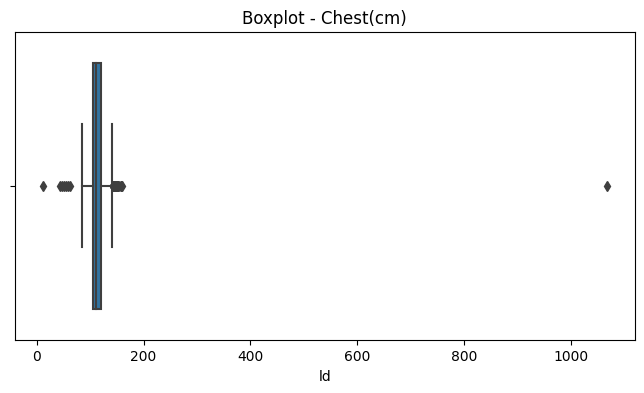

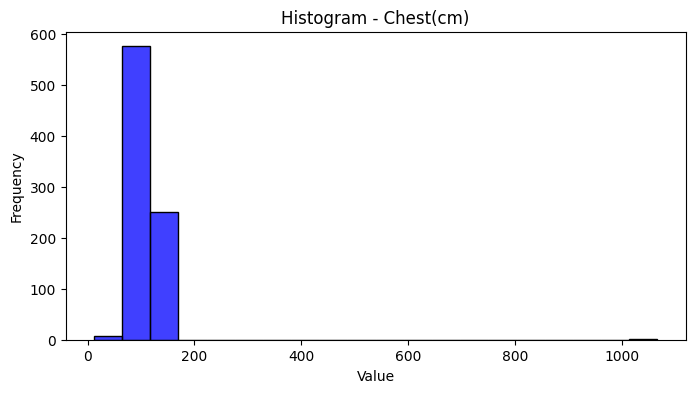

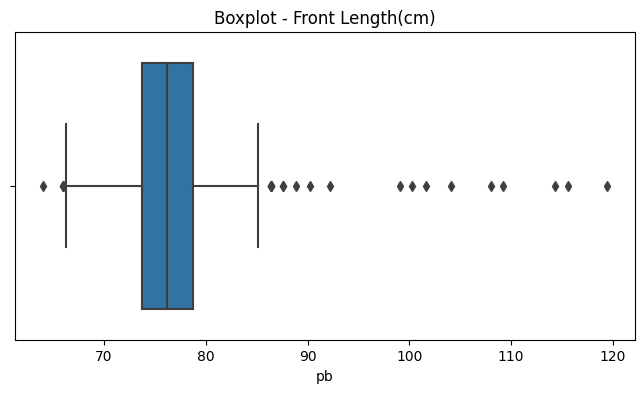

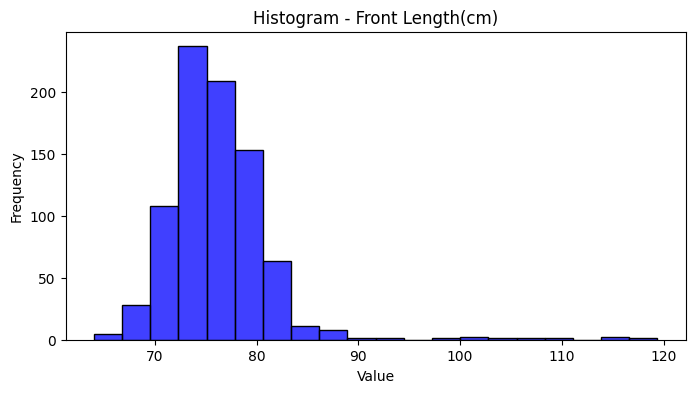

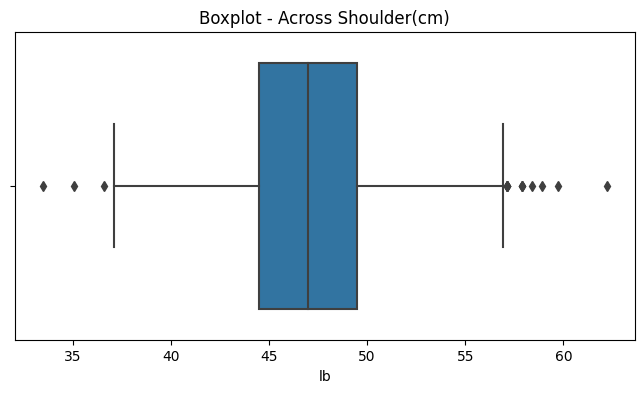

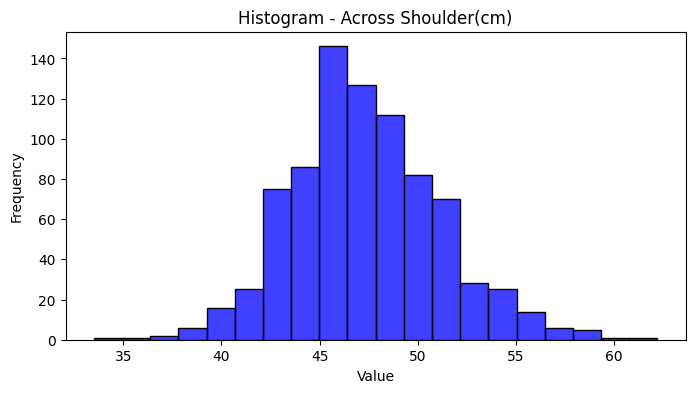

In [40]:
var = df[['ld', 'pb', 'lb']]
var_name = ['Chest(cm)', 'Front Length(cm)', 'Across Shoulder(cm)']

if len(var.columns) == len(var_name):
    for i in range(len(var.columns)):
        # Boxplot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=var[var.columns[i]])
        plt.title(f'Boxplot - {var_name[i]}')
        plt.show()

        # Histogram
        plt.figure(figsize=(8, 4))
        sns.histplot(var[var.columns[i]], bins=20, kde=False, color='blue')
        plt.title(f'Histogram - {var_name[i]}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
else:
    print("The number of variables and variable names do not match.")


# Handling Outlier

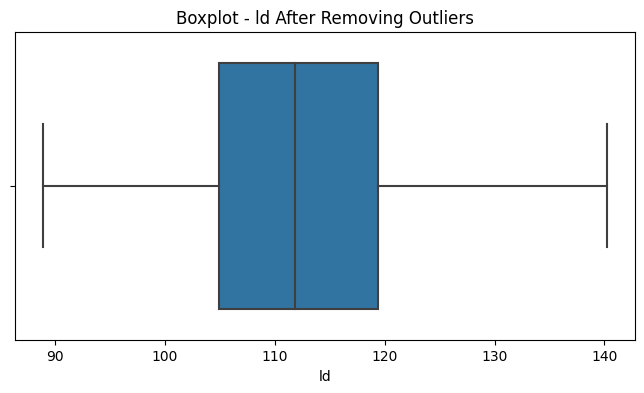

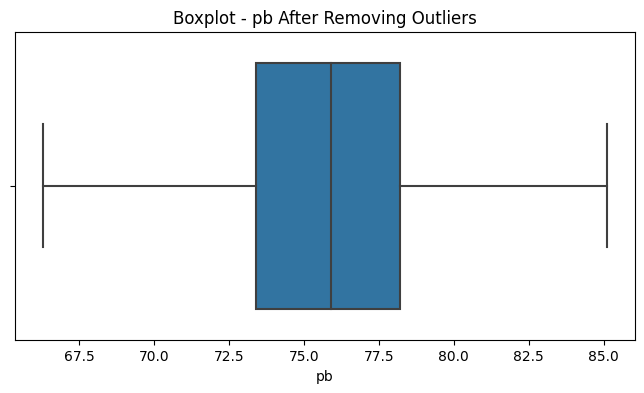

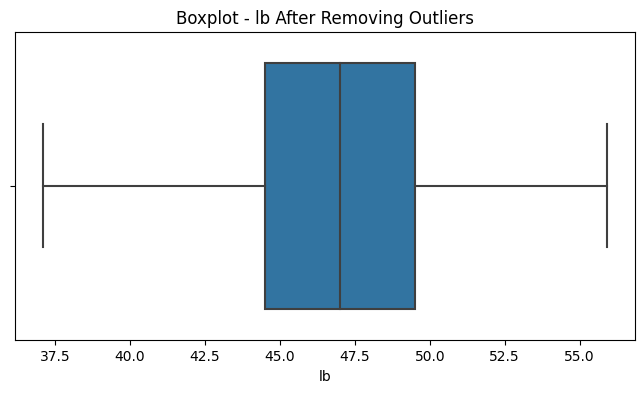

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
var_names = ['ld', 'pb', 'lb']

# Create a new DataFrame without outliers
df2 = df.copy()

for variable in var_names:
    Q1 = df2[variable].quantile(0.25)
    Q3 = df2[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Use boolean indexing to filter the DataFrame without outliers for the current variable
    df2 = df2[(df2[variable] >= lower_bound) & (df2[variable] <= upper_bound)]

# Boxplots for the new DataFrame (df2) without outliers
for variable in var_names:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=variable, data=df2)
    plt.title(f'Boxplot - {variable} After Removing Outliers')
    plt.show()

# Reset the index of df2
df2.reset_index(drop=True, inplace=True)


In [91]:
df.describe()

,ld,pb,lb
count,834.000000,834.000000,829.000000
mean,113.946763,76.115228,47.326538
std,35.658632,5.146851,3.770188
min,11.800000,64.000000,33.500000
25%,104.900000,73.700000,44.500000
50%,111.800000,76.200000,47.000000
75%,119.400000,78.700000,49.500000
max,1067.000000,119.400000,62.200000


In [93]:
df2.describe()

,ld,pb,lb
count,781.000000,781.000000,781.000000
mean,112.421511,75.543662,47.075928
std,10.138749,3.527100,3.308921
min,88.900000,66.300000,37.100000
25%,104.900000,73.400000,44.500000
50%,111.800000,75.900000,47.000000
75%,119.400000,78.200000,49.500000
max,140.200000,85.100000,55.900000


# uji kolmogorov smirnov

In [101]:
var=df2[['ld','pb','lb']]
for column in var.columns:
    # Check if the array is constant
    if np.all(var[column] == var[column][0]):
        print(f"{column} is a constant array.")
    else:
        # Perform the Shapiro-Wilk test
        stat, p_value = shapiro(var[column])
        print(f'Shapiro-Wilk Test for {column}: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test for ld: Statistic=0.9846708178520203, p-value=2.722948693190119e-07
Shapiro-Wilk Test for pb: Statistic=0.9891871213912964, p-value=1.630599763302598e-05
Shapiro-Wilk Test for lb: Statistic=0.9896252155303955, p-value=2.5278535758843645e-05


Data normal, gagal tolak h0

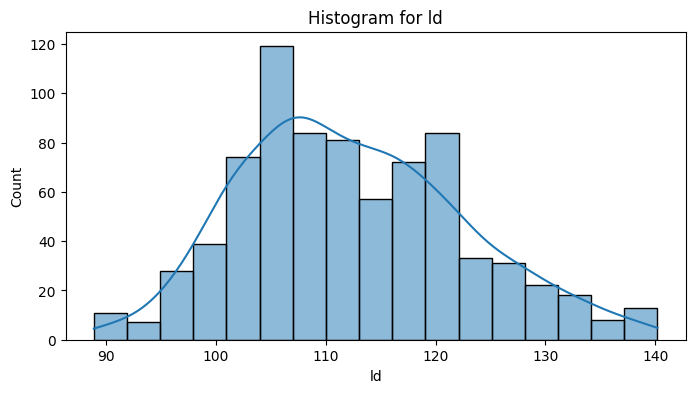

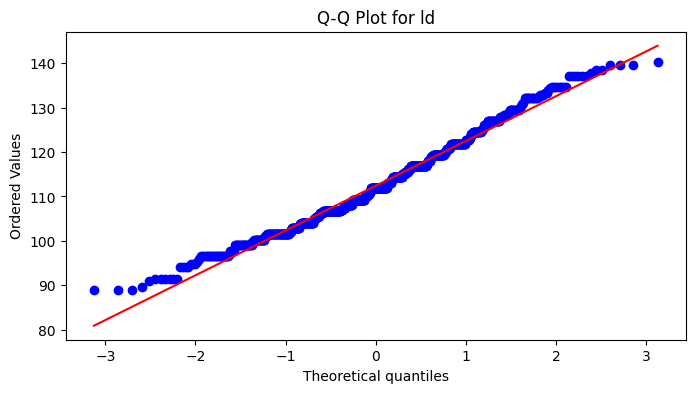

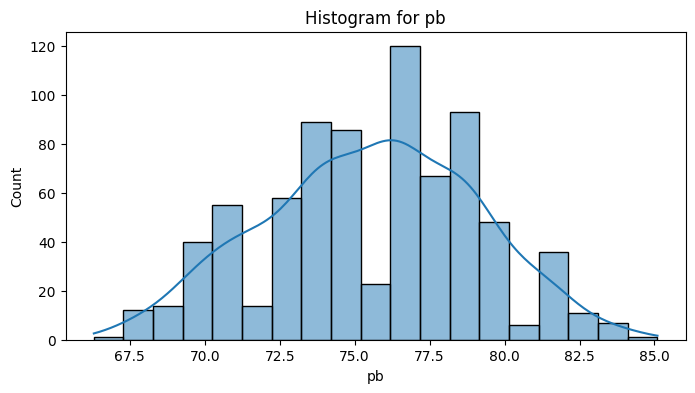

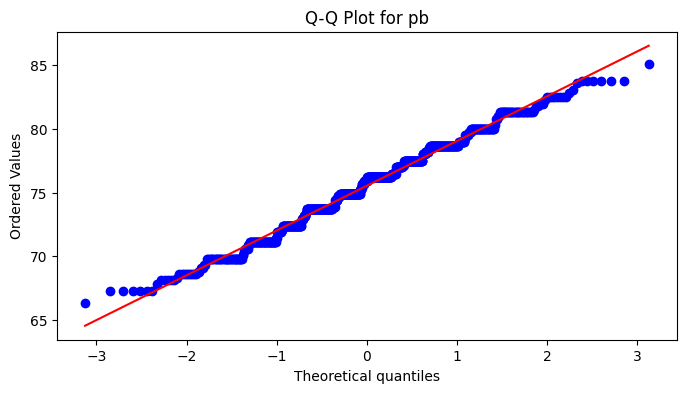

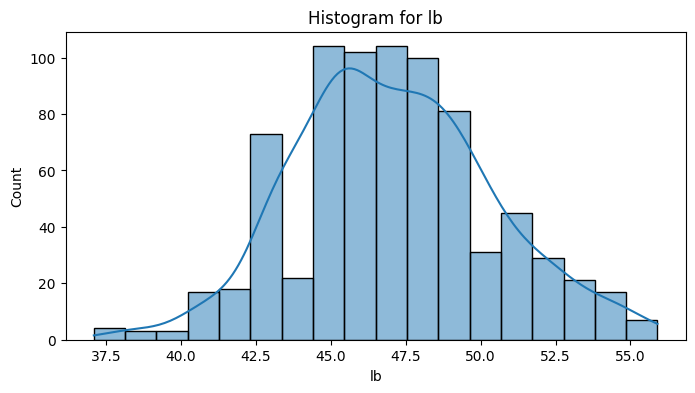

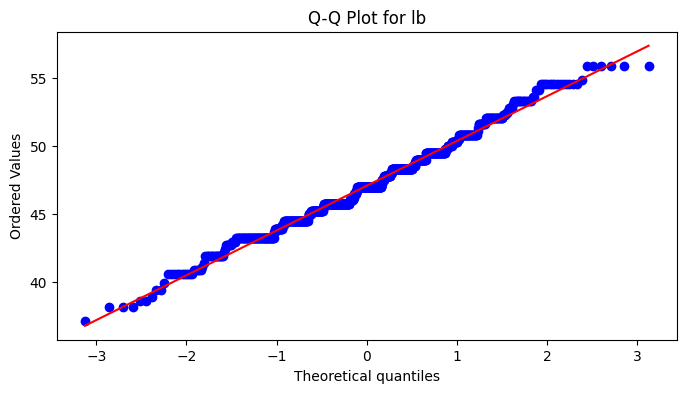

In [105]:
varbaru=df2[['ld','pb','lb']]
for column in varbaru.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(varbaru[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

    plt.figure(figsize=(8, 4))
    stats.probplot(varbaru[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

# MODEL

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [66]:
df2.head()

,Brand Name,Type,Size,Brand Size,ld,pb,lb
0,Roadster,Cotton,38,S,100.3,73.7,43.2
1,Roadster,Cotton,40,M,107.4,74.7,45.2
2,Roadster,Cotton,42,L,115.1,74.7,45.2
3,Roadster,Cotton,44,XL,122.7,76.5,49.0
4,Roadster,Cotton,46,XXL,130.3,82.0,50.8


In [112]:
x =df2.drop(['Brand Name','Type','Brand Size'],axis=1)
y =df2['Size']

In [113]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [114]:
X_train1.shape, X_test1.shape

((546, 4), (235, 4))

# Normalisasi

In [115]:
cols1 = X_train1.columns

In [116]:
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train1)

X_test1 = scaler.fit_transform(X_test1)

In [117]:
X_train1 = pd.DataFrame(X_train1, columns=[cols1])
X_train1.head()

,Size,ld,pb,lb
0,-0.529757,-0.031354,0.238002,-2.662844
1,0.083705,0.292026,0.095232,-0.015743
2,1.310628,2.702677,1.694255,2.244703
3,-1.143218,-0.785908,-0.475847,-0.759311
4,-1.756680,-1.158285,-1.932100,-1.145966


In [118]:
X_test1 = pd.DataFrame(X_test1, columns=[cols1])

In [119]:
X_test1.head()

,Size,ld,pb,lb
0,0.670444,1.911824,0.774680,-1.017508
1,1.324196,1.529014,1.847220,1.566150
2,0.670444,0.632431,0.774680,0.431861
3,0.670444,0.964871,0.435982,0.211305
4,-1.290813,-1.674507,-0.636558,-2.057273


# Melatih MODEL

In [120]:
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)
# Naive Bayes
nb = GaussianNB()

# Fitting Model

In [121]:
logreg.fit(X_train1, y_train1)
svm.fit(X_train1, y_train1)
nb.fit(X_train1, y_train1)

GaussianNB()

# Prediksi dataset

In [138]:
y_pred1_logreg = logreg.predict(X_test1)
y_pred1_svm = svm.predict(X_test1)
y_pred1_nb = nb.predict(X_test1)

# Report Hasil Akurasi

In [124]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test1, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test1, y_pred1_svm))
print('--------------------- NB  ----------------------------')
print(classification_report(y_test1, y_pred1_nb))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

          33       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          38       0.61      1.00      0.76        30
          39       0.00      0.00      0.00        18
          40       0.88      0.88      0.88        56
          41       0.00      0.00      0.00         2
          42       0.84      0.98      0.90        42
          44       0.89      0.86      0.88        49
          46       0.63      0.83      0.72        23
          47       0.00      0.00      0.00         1
          48       0.50      0.11      0.18         9
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         1

    accuracy                           0.77       235
   macro avg       0.29  

# Model Pickle

In [139]:
import pickle

models = nb

In [ ]:
with open('modelfix.pkl','wb') as file:
    pickle.dump(models, file)